# Import Package

In [ ]:
#Install Package
!pip install mlxtend
!pip install pip install googletrans

     |████████████████████████████████| 55 kB 3.3 MB/s 
     |████████████████████████████████| 1.3 MB 45.9 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 65 kB 4.5 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15734 sha256=4fb3952d25177116f1e5f08d87aa08fad19da62b8c3a822e755e5f473646ab7a
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)

# In Class Example

In [ ]:
#Import data
file = "15-ytekZjEwsSp2fZ9Zpvtwuqhj6efZ0Z"
dwn_url=f"https://drive.google.com/uc?export=download&id={file}"
df = pd.read_csv(dwn_url)
print(f"size of dataframe : {df.shape}")
print(f" Check missing values : \n{df.isnull().sum()}")
display(df.head(5))

size of dataframe : (21293, 4)
 Check missing values : 
Date           0
Time           0
Transaction    0
Item           0
dtype: int64


,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [ ]:
#Delete NONE item
print(f" Check NONE in item : {sum(df.Item == 'NONE')}")
df = df[df["Item"] != 'NONE']

 Check NONE in item : 786


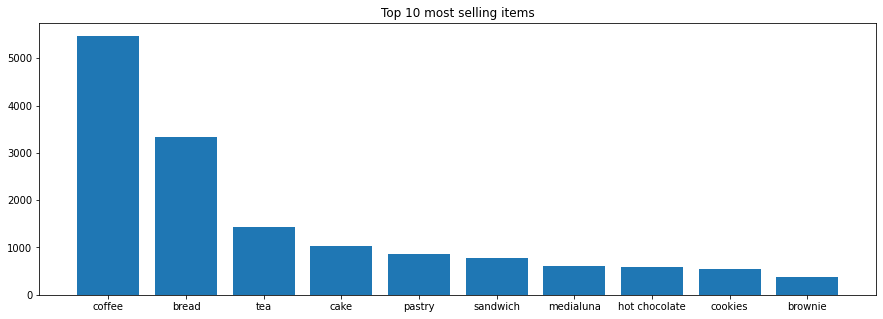

In [ ]:
df_for_top10_Items=df['Item'].value_counts().head(10)
Item_array= np.arange(len(df_for_top10_Items))

plt.figure(figsize=(15,5))
Items_name=['coffee','bread','tea','cake','pastry','sandwich','medialuna','hot chocolate','cookies','brownie']
plt.bar(Item_array,df_for_top10_Items.iloc[:])
plt.xticks(Item_array,Items_name)
plt.title('Top 10 most selling items')
plt.show()


In [ ]:
hot_encoded_df=df.groupby(['Transaction','Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
hot_encoded_df.head(3)

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,...,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
2,(Bread),(Pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(Pastry),(Bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(Coffee),(Brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
5,(Brownie),(Coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
6,(Coffee),(Cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
8,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125
9,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910


In [ ]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.5) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
7,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
12,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
15,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
19,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
24,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
28,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235


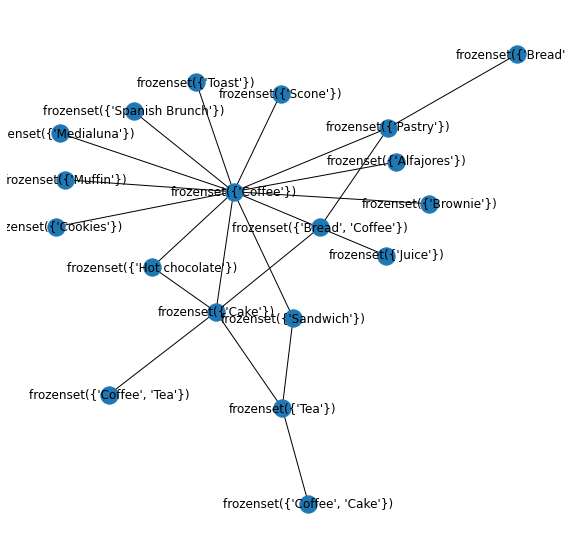

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
fig, ax=plt.subplots(figsize=(10,10))

GA=nx.from_pandas_edgelist(rules,source='antecedents',target='consequents')
nx.draw(GA,with_labels=True)

plt.show()

In [ ]:
item_item_matrix = pd.DataFrame(index=hot_encoded_df.columns,columns=hot_encoded_df.columns)

In [ ]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix.iloc[i,j] = 1 -cosine(hot_encoded_df.iloc[:,i],hot_encoded_df.iloc[:,j])

In [ ]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','cosine']


In [ ]:
links_filtered=links.loc[ (links['cosine'] > 0.1) & 
                         (links['item'] != links['related item']) ]
links_filtered.reset_index(drop=True).head()

,item,related item,cosine
0,Afternoon with the baker,Argentina Night,0.115278
1,Alfajores,Coffee,0.149032
2,Argentina Night,Afternoon with the baker,0.115278
3,Art Tray,Bacon,0.162221
4,Art Tray,Hack the stack,0.229416


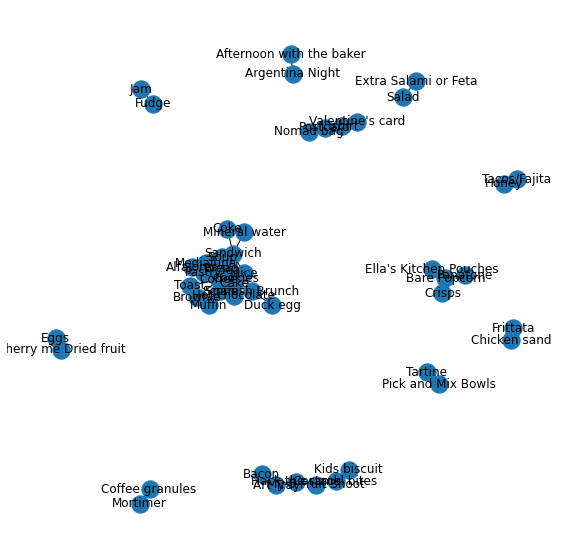

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA,with_labels=True)
plt.show()

# Inclass Practice

In [ ]:
#Import data
file = "1SlrknNoCBv2HhNw1Lq_eF7S2AW_TZh8u"
dwn_url=f"https://drive.google.com/uc?export=download&id={file}"
survey = pd.read_csv(dwn_url , dtype=str)
survey = survey.drop(columns=['Timestamp'])
survey = survey. fillna('ไม่เคยซื้อ')
print(f"size of dataframe : {survey.shape}")
print(f"All Value in data : {set(survey.values.reshape(survey.shape[0] * survey.shape[1]))}")
survey.head(3)

size of dataframe : (46, 41)
All Value in data : {'เคยซื้อ', 'เคย', 'ไม่เคย', 'ไม่เคยซือ', 'ไม่', 'ไม่เคยซื้อ'}


,playstation5,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,PS5,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด
0,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
1,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,เคยซื้อ,ไม่เคย,ไม่เคย,เคย,ไม่เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ
2,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,เคย,ไม่เคย,เคย,เคยซื้อ,ไม่,ไม่เคยซื้อ,ไม่เคย,ไม่เคย,ไม่เคยซือ,ไม่เคยซื้อ,ไม่เคย,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,ไม่เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ,เคยซื้อ


In [ ]:
def encode_units(x):
    if x in ( 'ไม่เคย', 'ไม่เคยซื้อ', 'ไม่เคยซือ', 'ไม่'):
        return 0
    if x in ('เคยซื้อ','เคย'):
        return 1
survey_encoded = survey.applymap(encode_units)
survey_encoded['play_station5'] = np.where((survey_encoded.playstation5==1)|(survey_encoded.PS5==1) ,1,0)
survey_encoded = survey_encoded.drop(columns=['playstation5','PS5'])
# lst_prd = survey_encoded.columns
# survey_encoded.columns = [i for i in range(len(lst_prd))]
survey_encoded.head(3)

,เครื่องทำขนมปัง,Ergonomic Wrist Rest,เครื่องอบผ้า,เครื่องชงกาแฟแคปซูล,เก้าอี้ LA-Z-Boy,เครื่องให้อาหารสัตว์อัตโนมัติ,บัตตาเลี่ยน,แก้วเก็บความเย็น,ลู่วิ่งออกกำลังกาย,Kindle,เครื่องซักผ้า,Bluetooth Speaker,ห้องน้ำแมวอัตโนมัติ,ทรายแมว,ลำโพง pixel,Logitech Mx Master 3 Mouse,ตุ๊กตา ty,น้ำพุแมว,Robot ดูดฝุ่น,Mechanical keyboard,Nintendo switch,หนังสือ python,gaming chair,Deskmat,Dew - ไฟโรเซ่,เทียนหอม jo malone,กระติกน้ำ 2 ลิตร,ที่นอน memory form,พลาสเตอร์บรรเทาปวด ตราเสือ,การ์ดจอ RTX 3080,ขนมจีนน้ำยาปู,Salmon Sashimi,จักรยานเสือหมอบ,ไฟแต่งห้องมินิมอล,External Harddisk,หม้อทอดไร้น้ํามัน,airpods,ยาดม,ไฟส่องหน้าไลฟ์สด,play_station5
0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,0


In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(survey_encoded, min_support=0.1, use_colnames=True) #, min_support=0.1
as_rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
as_rules["antecedent_len"] = as_rules["antecedents"].apply(lambda x: len(x))
as_rules["consequents_len"] = as_rules["consequents"].apply(lambda x: len(x))
print(f"All rule = {as_rules.shape}")
as_rules.head(10)

All rule = (781584, 11)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(แก้วเก็บความเย็น),(เครื่องอบผ้า),0.717391,0.130435,0.130435,0.181818,1.393939,0.036862,1.062802,1,1
1,(เครื่องอบผ้า),(แก้วเก็บความเย็น),0.130435,0.717391,0.130435,1.000000,1.393939,0.036862,inf,1,1
2,(เครื่องซักผ้า),(เครื่องอบผ้า),0.521739,0.130435,0.130435,0.250000,1.916667,0.062382,1.159420,1,1
3,(เครื่องอบผ้า),(เครื่องซักผ้า),0.130435,0.521739,0.130435,1.000000,1.916667,0.062382,inf,1,1
4,(Bluetooth Speaker),(เครื่องอบผ้า),0.739130,0.130435,0.108696,0.147059,1.127451,0.012287,1.019490,1,1
5,(เครื่องอบผ้า),(Bluetooth Speaker),0.130435,0.739130,0.108696,0.833333,1.127451,0.012287,1.565217,1,1
6,(กระติกน้ำ 2 ลิตร),(เครื่องอบผ้า),0.217391,0.130435,0.108696,0.500000,3.833333,0.080340,1.739130,1,1
7,(เครื่องอบผ้า),(กระติกน้ำ 2 ลิตร),0.130435,0.217391,0.108696,0.833333,3.833333,0.080340,4.695652,1,1
8,(พลาสเตอร์บรรเทาปวด ตราเสือ),(เครื่องอบผ้า),0.565217,0.130435,0.108696,0.192308,1.474359,0.034972,1.076605,1,1
9,(เครื่องอบผ้า),(พลาสเตอร์บรรเทาปวด ตราเสือ),0.130435,0.565217,0.108696,0.833333,1.474359,0.034972,2.608696,1,1


In [ ]:
print('Table 1 : Association rule by top10 lift \n เลือก Association rule ที่เริ่มต้นเพียงแค่ 1 Product เพื่อให้ง่ายต่อการนำไปใช้จริง และเลือก Rule ที่มีค่า lift  >=1 และมี confidence>0.5 หลังจากนั้นเรียงลำดับ Rule ที่มี Support จากมากไปน้อย ')
as_rules[ (as_rules['lift'] >= 2) &(as_rules['confidence'] >= 0.5) &(as_rules['antecedent_len']==1)].sort_values(by=['support'] ,ascending=False).head(10)

Table 1 : Association rule by top10 lift 
 เลือก Association rule ที่เริ่มต้นเพียงแค่ 1 Product เพื่อให้ง่ายต่อการนำไปใช้จริง และเลือก Rule ที่มีค่า lift  >=1 และมี confidence>0.5 หลังจากนั้นเรียงลำดับ Rule ที่มี Support จากมากไปน้อย 


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
3349,(Robot ดูดฝุ่น),"(ขนมจีนน้ำยาปู, Mechanical keyboard)",0.347826,0.282609,0.217391,0.625000,2.211538,0.119093,1.913043,1,2
10091,(Robot ดูดฝุ่น),"(แก้วเก็บความเย็น, เครื่องซักผ้า, ขนมจีนน้ำยาปู)",0.347826,0.304348,0.217391,0.625000,2.053571,0.111531,1.855072,1,3
45885,(Robot ดูดฝุ่น),"(แก้วเก็บความเย็น, Salmon Sashimi, ขนมจีนน้ำยา...",0.347826,0.260870,0.195652,0.562500,2.156250,0.104915,1.689441,1,4
131079,(Robot ดูดฝุ่น),"(แก้วเก็บความเย็น, เครื่องซักผ้า, airpods , Bl...",0.347826,0.239130,0.195652,0.562500,2.352273,0.112476,1.739130,1,5
1327,(กระติกน้ำ 2 ลิตร),"(แก้วเก็บความเย็น, เครื่องซักผ้า)",0.217391,0.434783,0.195652,0.900000,2.070000,0.101134,5.652174,1,2
28684,(ไฟแต่งห้องมินิมอล),"(External Harddisk, ยาดม, หม้อทอดไร้น้ํามัน)",0.239130,0.391304,0.195652,0.818182,2.090909,0.102079,3.347826,1,3
28589,(ไฟแต่งห้องมินิมอล),"(ยาดม, Salmon Sashimi, หม้อทอดไร้น้ํามัน)",0.239130,0.391304,0.195652,0.818182,2.090909,0.102079,3.347826,1,3
46359,(Robot ดูดฝุ่น),"(แก้วเก็บความเย็น, External Harddisk, เครื่องซ...",0.347826,0.260870,0.195652,0.562500,2.156250,0.104915,1.689441,1,4
23527,(Robot ดูดฝุ่น),"(Salmon Sashimi, ขนมจีนน้ำยาปู, Mechanical key...",0.347826,0.260870,0.195652,0.562500,2.156250,0.104915,1.689441,1,3
10159,(Robot ดูดฝุ่น),"(แก้วเก็บความเย็น, เครื่องซักผ้า, airpods )",0.347826,0.260870,0.195652,0.562500,2.156250,0.104915,1.689441,1,3


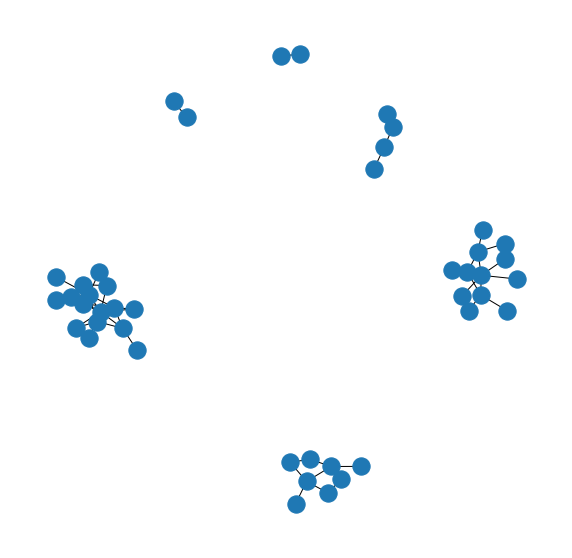

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
plt.rcParams["font.family"] = "Tahoma"
fig, ax=plt.subplots(figsize=(10,10))
GA_rule = as_rules.sort_values(by=['lift'] ,ascending=False).head(100)
GA=nx.from_pandas_edgelist(GA_rule,source='antecedents' ,target='consequents')
nx.draw(GA ) #,with_labels=True

plt.show()

In [ ]:
from scipy.spatial.distance import cosine
item_matrix = pd.DataFrame(index=survey_encoded.columns,columns=survey_encoded.columns)
for i in range(0,len(item_matrix.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_matrix.columns)) :
      # Fill in placeholder with cosine similarities
      item_matrix.iloc[i,j] = 1 -cosine(survey_encoded.iloc[:,i],survey_encoded.iloc[:,j])

In [ ]:
links = item_item_matrix.rename_axis('related item' ,axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [ ]:
links_filtered=links.loc[ (links['value'] > 0.1) &  (links['item'] != links['related item']) ]

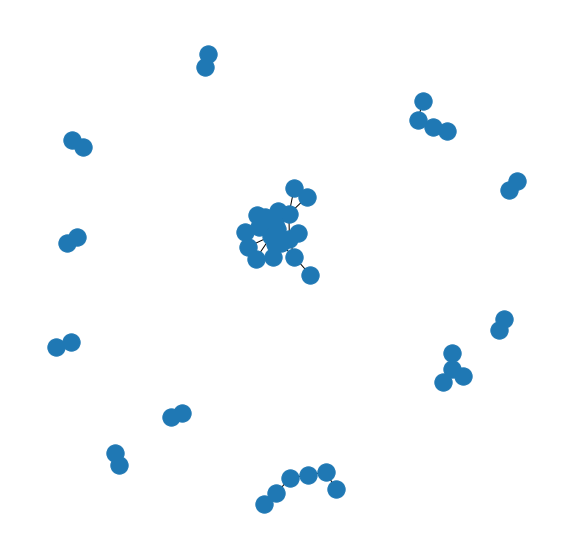

In [ ]:
fig, ax=plt.subplots(figsize=(10,10))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item')
nx.draw(GA)
plt.show()